### <p style="text-align: right;"> &#9989; Nathan Kurt</p>

#### <p style="text-align: right;"> &#9989; Put your group member names here.</p>

# Day 23 In-class Assignment: Analyzing climate data

<img src="https://news.nationalgeographic.com/content/dam/news/photos/000/782/78250.adapt.1900.1.jpg" width=500px>

## Goals for today's in-class assignment

* Analyze multiple datasets to understand trends and correlations between different experimental measurements relating to the Earth's climate

## Assignment instructions

Work with your group to complete this assignment. Instructions for submitting this assignment are at the end of the notebook. The assignment is due at the end of class.  If you haven't completed all sections of the assignment, you still need to upload something!

---
**In today's class**, we are going to examine several datasets that show how various quantities (such as global temperature and atmospheric carbon dioxide levels) have evolved over time.  The datasets that we will use are:


1. A reconstruction of the global surface temperature, deep-sea temperature, ice volume, and relative sea level for the last **3 million years**.  This data, in the file ```bintanja2008.txt```, comes from the National Oceanic and Atmospheric Administration's National Climatic Data Center website, and can be [found here](https://www.ncdc.noaa.gov/paleo-search/study/11933).  Note that the temperature measurements in this file are estimated using a proxy measurement using the chemical composition of core samples from ocean sediments.
2. Measurements of global mean air temperatures from 1880 through the present day. Specifically, these are recorded as **deviations from the mean temperature** at a particular time. This data, in the file ```GLB.Ts.csv```, comes from the [NASA GISS surface temperature website](http://data.giss.nasa.gov/gistemp/), "Global-mean monthly, seasonal, and annual means, 1880-present."  See [this file](http://data.giss.nasa.gov/gistemp/tabledata_v3/GLB.Ts.txt) for clues as to what the columns mean.  Note that these temperatures are measured directly (i.e., with thermometers), rather than estimated using a proxy!
3. Measurements of average monthly atmospheric [carbon dioxide](https://en.wikipedia.org/wiki/Carbon_dioxide) (CO2) concentration from 1958 through the present, measured at the Mauna Loa Observatory in Hawaii.  This data, in the file ```co2_mm_mlo.txt,``` comes from the [Earth Systems Research Laboratory](https://www.esrl.noaa.gov/gmd/ccgg/trends/) global monitoring division, and can be [found here](ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt).  Note that the "concentration" data is reported in units of "micromol/mol", meaning parts per million in the atmosphere.  This data is measured directly.
4. Measurements of average average yearly [methane](https://en.wikipedia.org/wiki/Methane) (CH4) concentrations from 1984 through the present, measured at a variety of locations around the world.  This data, in the file ```ch4_annmean_gl.txt```, also comes from the [Earth Systems Research Laboratory](https://www.esrl.noaa.gov/gmd/ccgg/trends_ch4/), and can be [found here](ftp://aftp.cmdl.noaa.gov/products/trends/ch4/ch4_annmean_gl.txt).  In this file, the "concentration level" is listed in parts per billion (rather than parts per million, as was done with CO2).  This data is measured directly.
5. Reconstructions of the global atmospheric temperature, as well as atmospheric CO2 and CH4 levels, from [ice core samples](https://en.wikipedia.org/wiki/Ice_core) taken at the [Vostok Research Station](https://en.wikipedia.org/wiki/Vostok_Station) in Antarctica.  Again, the temperature values are recorded as deviations from the mean temperature at a particular time. This data is in the files ```vostok-deutnat.txt``` (temperature), ```vostok-co2nat.txt``` (CO2), and ```vostok-ch4nat.txt``` (CH4).  This data was obtained from the [National Centers for Environmental Information](https://www.ncdc.noaa.gov/) and can be found [at this web page](https://www1.ncdc.noaa.gov/pub/data/paleo/icecore/antarctica/vostok/).  The temperature is estimated; CO2 and CH4 concentrations are measured directly from the ice.

Open up each of the datasets and look at the headers - that is, the block of text at the top that describes what's in the file.  You will have to do this to understand which columns you want to use, what the units are, and so on.

---

### Using Numpy, read each of these datasets into numpy arrays!

You may run into confusing issues if you try to use Pandas to read in these datasets. Given this, you are expected to use `np.loadtxt()` to read them in. You will have to take into account the fact that each of the files has a header of a different length - you can either figure the length out yourself, or **look at the README provided at the bottom of this notebook**.  Then, **modify the times and temperatures for each dataset so that they have consistent units** (since some datasets are in "years before present", whereas others use the Gregorian dating system, and some of the datasets use temperature differences in Kelvin whereas others use hundredths of a Kelvin. If you're not familiar with Kelvin as a temperature unit, look [here](https://en.wikipedia.org/wiki/Kelvin)).

In [1]:
# put your code here
import numpy as np
import pandas as pd


In [36]:
ocean_temps = np.loadtxt("bintanja2008.txt",skiprows = 109)

air_temps = np.loadtxt("GLB.Ts.csv",unpack= True, skiprows = 1, delimiter=",")
carbon_di = np.loadtxt("co2_mm_mlo.txt", unpack=True,skiprows = 72)
methane = np.loadtxt("ch4_annmean_gl.txt", unpack=True,skiprows = 56)
temps_ice = np.loadtxt("vostok-deutnat.txt", unpack=True,skiprows = 111)
carbon_ice = np.loadtxt("vostok-co2nat.txt", unpack=True,skiprows = 155)
methane_ice = np.loadtxt("vostok-ch4nat.txt", unpack=True,skiprows = 86)

ocean_temps[0] = (ocean_temps[0] * -1000) + 2018
ocean_temps[4] = (ocean_temps[4]) + 273
ocean_temps[5] = (ocean_temps[5]) + 273


air_temps[13] = air_temps[13] / 100

temps_ice[1] = (temps_ice[1] * -1) + 2018


---
### Now, let's examine the datasets!

You've already looked at the Bintanjan dataset in the pre-class assignment, so we won't worry about that for the time being.  But, let's make a matplotlib subplot that shows the global temperature, CO2, and CH4 concentrations since 1880 (and in the case of the CO2 and CH4 data, for as long as you have data) using the files ```GLB.Ts.csv```, ```co2_mm_mlo.txt```, and ```ch4_annmean_gl.txt```.  Make sure that they all have the same x-axis! You should get something that looks like this:

<img src="https://i.imgur.com/MmbnL1l.png">

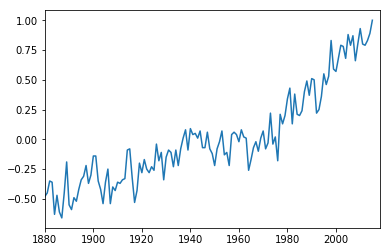

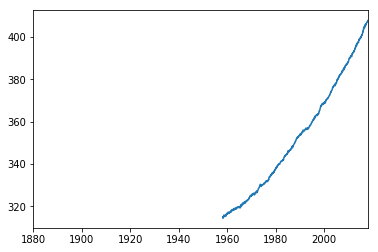

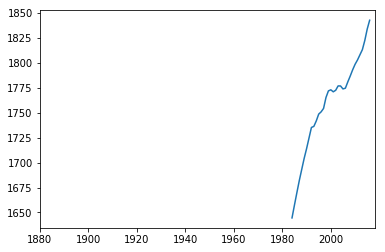

In [32]:
# put your code here
import matplotlib.pyplot as plt

plt.plot(air_temps[0], air_temps[13])
plt.xlim(1880, 2018)
plt.show()

plt.plot(carbon_di[2], carbon_di[5])
plt.xlim(1880, 2018)
plt.show()

plt.plot(methane[0], methane[1])
plt.xlim(1880, 2018)
plt.show()






**Question:** What relationship do you see between the temperature, CO2 concentration, and CH4 concentration in the recent data?

**Put your answer here!**

They are increasing over time

**Now, let's visualize the Vostok ice core data.**  Make a subplot that shows the same three quantities - temperature, CO2 concentration, and CH4 concentration - as a function of time.

Your plot should end up looking similar to this:

<img src="https://i.imgur.com/aIgnsun.png">

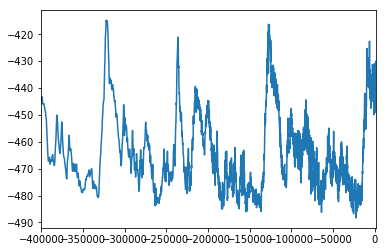

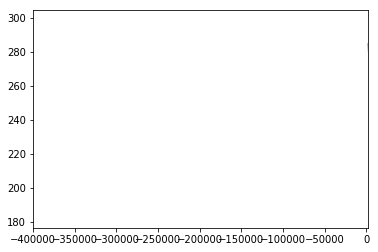

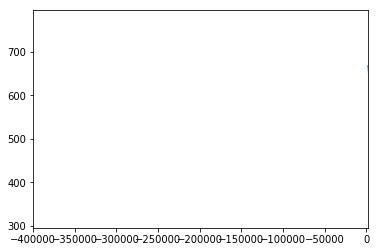

In [37]:
# put your code here
plt.plot(temps_ice[1], temps_ice[2])
plt.xlim(-400000, 2018)
plt.show()

plt.plot(carbon_ice[0], carbon_ice[1])
plt.xlim(-400000, 2018)
plt.show()

plt.plot(methane_ice[0], methane_ice[1])
plt.xlim(-400000, 2018)
plt.show()




**Questions:** 

1.  Does this data suggest similar relationships between the temperature, CO2, and CH4 concentrations as the data you examined above?
2.  Does this data show the same patterns as the Bintanjan data that you displayed as part of your pre-class assignment?


**Put your answers here!**

**Now, let's see if the datasets are consistent!**  In three separate cells, plot:

1.  All of the temperature datasets
2.  The Vostok ice core and more current measurements for carbon dioxide that come from the Earth Systems Research Laboratory.
3.  The Vostok ice core and more current measurements for methane that come from the Earth Systems Research Laboratory.

Look for consistency between the datasets.  You may have to change the x- and y-axis limits to zoom in on different regions, since the datasets cover very different spans of time!

In [ ]:
# put your code here


In [ ]:
# put your code here


In [ ]:
# put your code here


**Report on the results that you find!**  

In particular, are the temperature measurements consistent, or not?  Why do you think this is?  (Think about the way that these are measured!)

Regarding the carbon dioxide and methane measurements, which are quite reliable, what is the difference between the long-timescale behavior and more recent (post Industrial Revolution) measurements?

What do you think the implications of your answers are? 

**Put your answers here!**



---
### Now, let's make some predictions

Now, let's extrapolate this data into the future - in particular, we want to predict how global carbon dioxide concentration, and also global temperature, will rise over the next few decades if current trends continue.

Examine how both global temperature and global CO2 concentration have changed since 1960.  Do the trends look like linear trends, exponential trends, or something else?  Choose a reasonable period of time over which to fit the data (at least several decades), and fit the appropriate curve to the data.  If you predict forward in time 20, 50, and 100 years, what will the global temperature and CO2 concentrations be if the current trends continue?  **Show this with a plot, and describe your outcomes below**.  (Hint: try using NumPy's [polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) and/or SciPy's [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) methods!)

If you decide it would be useful, one possible general equation for an exponential curve is:

$$ f(t) = A e^{B(t-C)} + D $$

In [ ]:
# put your code here


**Describe your findings here!**

---
## Assignment wrapup

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [38]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://goo.gl/forms/5aV3ETSKq5Va8n1B2" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "In-Class Assignments" folder, find the submission link for <font color="red">Day 23</font>, and upload everything there. Make sure your name is on it!

&#169; Copyright 2018,  Michigan State University Board of Trustees

---
---
---
# Dataset README

## Datasets from the modern era

GLB.Ts.csv -- Measurements of global mean air temperatures from 1880
through the present day.  Note that temperatures are in hundredths of
a degree Kelvin. The header is 1 line long.

co2_mm_mlo.txt -- Measurements of average monthly atmospheric carbon
dioxide (CO2) concentration from 1958 through the present.  The header
is 72 lines long.

ch4_annmean_gl.txt -- Measurements of average average yearly methane
(CH4) concentrations from 1984 through the present.  The header is 56
lines long.

## Marine sediment dataset

bintanja2008.txt -- A reconstruction of the global surface
temperature, deep-sea temperature, ice volume, and relative sea level
for the last 3 million years.  The header is 109 lines long.

## Vostok datasets

vostok-deutnat.txt -- Reconstructions of the global atmospheric
temperature using ice core data.  Note that column 2 is ice age (i.e.,
number of years in the past) and column 4 is the temperature
difference from the present day in degrees Kelvin.  The header is 111
lines long.

vostok-co2nat.txt -- Reconstructions of the global carbon dioxide
(CO2) concentration using ice core data.  The header is 155 lines
long.

vostok-ch4nat.txt -- Reconstructions of the global methane (CH4)
concentration using ice core data.  The header is 86 lines long.